By zyad Alatar

# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv",sep=';')

In [3]:
#Shape of the general demographics data
print("The general demographics data shape",azdias.shape)

The general demographics data shape (891221, 85)


In [4]:
#Shape of the feature summary file
print("The feature summary file shape",feat_info.shape)

The feature summary file shape (85, 4)


In [5]:
#exploring general demographics data
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [6]:
#exploring general demographics data
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [7]:
#exploring feature summary file
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [8]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [9]:
# will get the missing_or_unknown as a list 
def processMissingOrUnknownValues(missing_or_unknown_cloumn):
    missing_unknown_values_list=[]
    
    for val in missing_or_unknown_cloumn:
        missing_unknown_values_list.append(val[1:-1].split(","))
 
    return missing_unknown_values_list

In [10]:
missing_unknown_values_list=processMissingOrUnknownValues(feat_info["missing_or_unknown"])

In [11]:
# Identify missing or unknown data values and convert them to NaNs.
for attribute,attribute_missing_unknown_values_list in zip(feat_info["attribute"],missing_unknown_values_list):
    
    #if there were missing values
    if attribute_missing_unknown_values_list[0] != "": 
        for val in attribute_missing_unknown_values_list:
            
            #to ensure the validity of comparisions
            if val.isnumeric() | val.lstrip('-').isnumeric():
                val = int(val)
            
            #the step that we assign NaN to the missing or unknown indexes
            azdias.loc[azdias[attribute] == val, attribute] = np.nan

In [12]:
 azdias.head(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,NaN,2.0,2.0,5.0,1.0,5.0,1.0,5.0,4.0,3.0,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,NaN,1.0,1.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,NaN,3.0,1.0,3.0,4.0,4.0,2.0,4.0,2.0,2.0,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,NaN,3.0,2.0,4.0,2.0,4.0,2.0,3.0,5.0,4.0,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [13]:
# Perform an assessment of how much missing data there is in each column of the dataset.

count_Nans=azdias.isnull().sum(axis = 0)

count_Nans

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [14]:
size=azdias.shape[0]
count_Nans_percentage=(count_Nans/size)*100
count_Nans_percentage

AGER_TYP                 76.955435
ALTERSKATEGORIE_GROB      0.323264
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR              44.020282
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP               12.476816
LP_LEBENSPHASE_FEIN      10.954859
LP_LEBENSPHASE_GROB      10.611509
LP_FAMILIE_FEIN           8.728699
LP_FAMILIE_GROB           8.728699
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

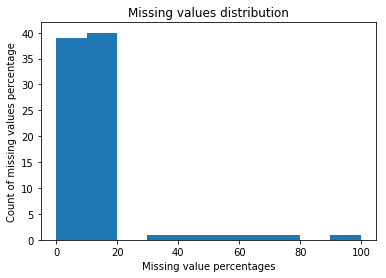

In [15]:
#hist that shows # of attributes that has this range of missing values percengate 
plt.hist(count_Nans_percentage)

plt.title('Missing values distribution')
plt.xlabel('Missing value percentages')
plt.ylabel('Count of missing values percentage')

plt.show()

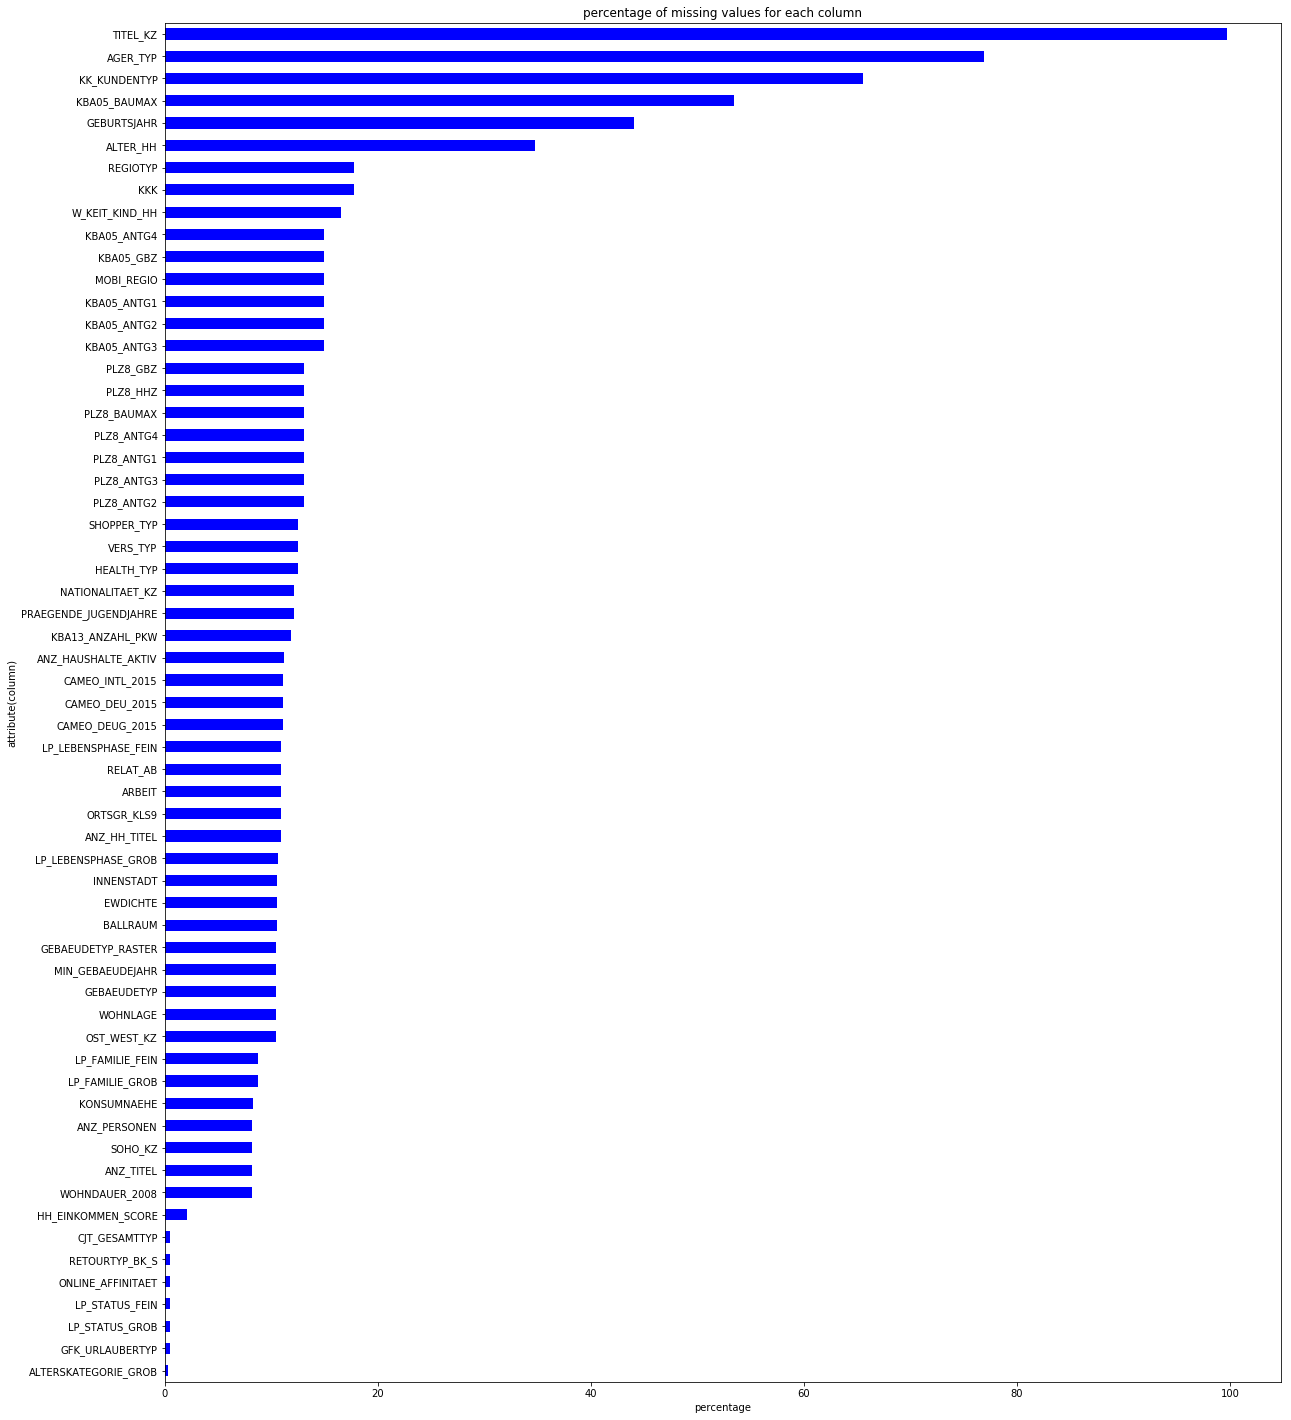

In [16]:
# Investigate patterns in the amount of missing data in each column.

#first lets sort the percentages in order to get clearly insight
count_Nans_percentage=count_Nans_percentage.sort_values()

#then lets drop columns with %0 missing value
count_Nans_percentage=count_Nans_percentage[count_Nans_percentage>0]

#then lets plot them
count_Nans_percentage.plot(kind='barh', figsize=(20,25), title="percentage of missing values for each column",color='b')
plt.xlabel('percentage')
plt.ylabel('attribute(column)');

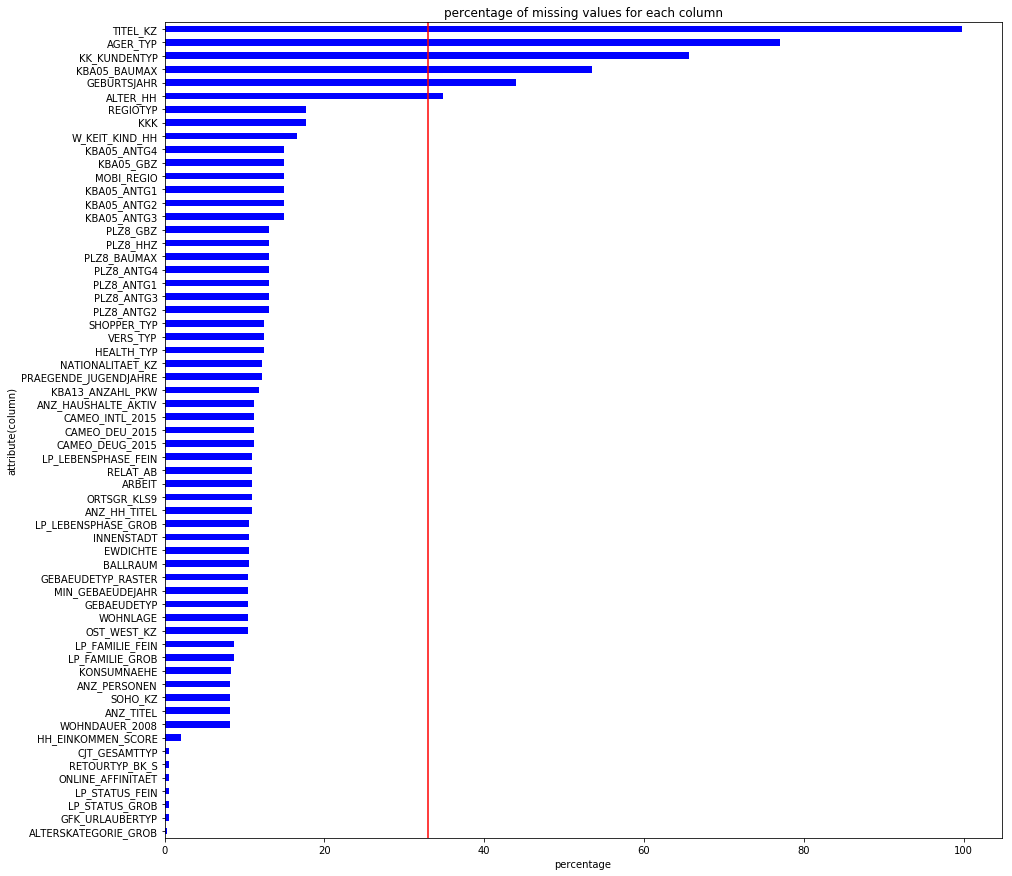

In [17]:
# Remove the outlier columns from the dataset. (You'll perform other data engineering tasks such as re-encoding and imputation later.)

#Now we can see that most attributes have less than 33% missing values thus will have a seperator at 33 to clearify more
outlier_seperator=33
count_Nans_percentage.plot(kind='barh', figsize=(15,15), title="percentage of missing values for each column",color='b')
plt.xlabel('percentage')
plt.ylabel('attribute(column)');
plt.axvline(outlier_seperator,color='red');


Now its very clear that we need to deal with the outliers that have more than %33 missing values

In [18]:
#getting indexes of the columns that have >%33 missing value percentage
list_to_drop=[]
for index,value in zip(count_Nans_percentage.index,count_Nans_percentage.values):
    if(value >33):
        list_to_drop.append(index)
 
list_to_drop

['ALTER_HH',
 'GEBURTSJAHR',
 'KBA05_BAUMAX',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'TITEL_KZ']

In [19]:
#dropping
azdias=azdias.drop(columns=list_to_drop)

In [20]:
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [21]:
azdias.shape

(891221, 79)

In [22]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 79 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null float64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null float64
FINANZ_SPARER            891221 non-null float64
FINANZ_VORSORGER         891221 non-null float64
FINANZ_ANLEGER           891221 non-null float64
FINANZ_UNAUFFAELLIGER    891221 non-null float64
FINANZ_HAUSBAUER         891221 non-null float64
FINANZTYP                891221 non-null float64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
LP_FAMILIE_FEIN          813429 non-null float64
LP_FAMILIE_GROB          813429 non-null float64
LP_STATUS_FEIN           886367 non-null float64
LP_STATUS

#### Discussion 1.1.2: Assess Missing Data in Each Column
The are 6 columns that were removed.From Person-level features we have AGER_TYP and TITEL_KZ,from Household-level features we have ALTER_HH and KK_KUNDENTYP,from Building-level features we have GEBAEUDETYP,from RR3 micro-cell features we have KBA05_BAUMAX.Person-level features have highest missing value percentage


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [23]:
# How much data is missing in each row of the dataset?

row_count_Nans=azdias.isnull().sum(axis = 1)

row_count_Nans

0         43
1          0
2          0
3          7
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        47
12         6
13         8
14        47
15         8
16         6
17        47
18         3
19         0
20        10
21         0
22         0
23         8
24        47
25         5
26        19
27         0
28         0
29         2
          ..
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0
891197     0
891198     0
891199     0
891200     0
891201     0
891202     0
891203    14
891204     0
891205     0
891206     0
891207     0
891208     3
891209     0
891210     0
891211     0
891212     0
891213     0
891214     0
891215     0
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64

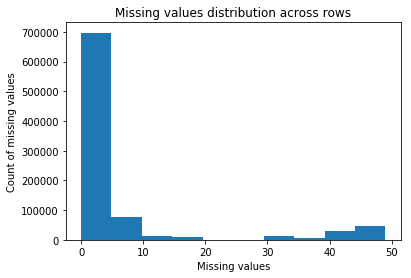

In [24]:
plt.hist(row_count_Nans)

plt.title('Missing values distribution across rows')
plt.xlabel('Missing values')
plt.ylabel('Count of missing values')

plt.show()

In [25]:
# Write code to divide the data into two subsets based on the number of missing values in each row.

#its abvious from the histogram that we can divide the data into two subsets >25 and <=25

row_count_Nans_less_than_25=azdias[row_count_Nans<25]
row_count_Nans_more_than_25=azdias[row_count_Nans>=25]

In [26]:
# Compare the distribution of values for at least five columns where there are no or few missing values, between the two subsets.

#first we will get the columns with <%10 missing value ->15 columns
columns=count_Nans_percentage[count_Nans_percentage<10].index

#we will pick randomly from column 5 to 10
columns=columns[5:10]

columns

Index(['RETOURTYP_BK_S', 'CJT_GESAMTTYP', 'HH_EINKOMMEN_SCORE',
       'WOHNDAUER_2008', 'ANZ_TITEL'],
      dtype='object')

Between the two datasets and for each column above we will compare the distribution of the column 

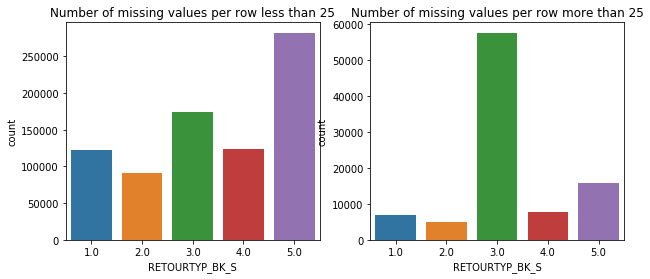

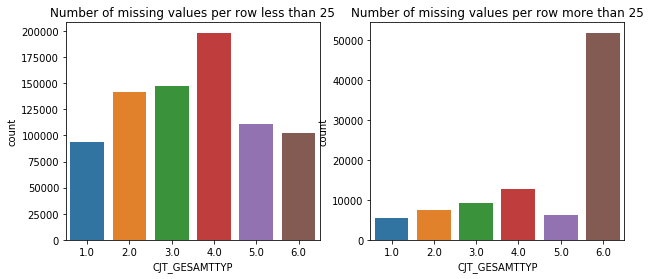

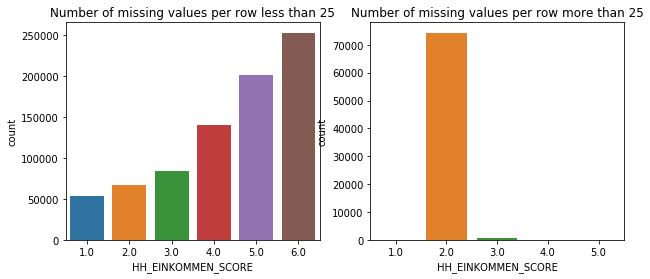

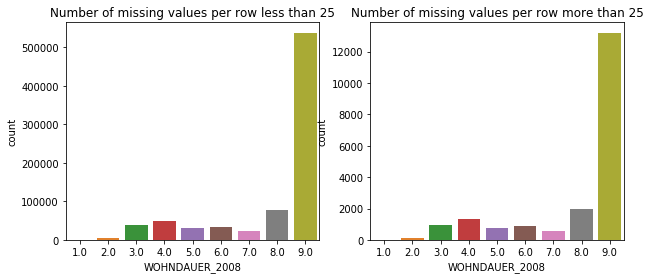

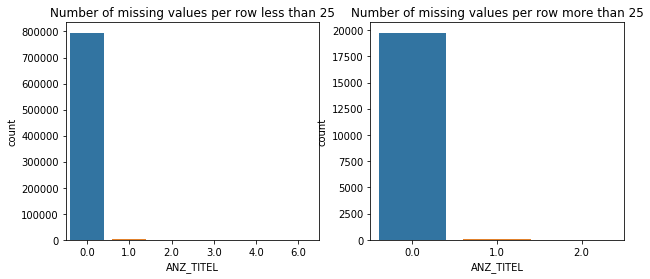

In [27]:
#to reduce the written code we will have a function that will plot the distribution of the column for each dataset

def graphColumn(column):
    
    
    figure, (fig1, fig2) = plt.subplots(1, 2)
    figure.set_figwidth(10)
    
    #plot 1
    fig1.set_title('Number of missing values per row less than 25')
    
   
    sns.countplot(azdias.loc[row_count_Nans_less_than_25.index,column],ax=fig1)
    
   
    #plot 2
    fig2.set_title('Number of missing values per row more than 25')
    sns.countplot(azdias.loc[row_count_Nans_more_than_25.index,column],ax=fig2)
    
    plt.show()
for i in columns:
    graphColumn(i)

#### Discussion 1.1.3: Assess Missing Data in Each Row

By looking to the abservations above we can see that there is a huge difference in the number of missing values per row for the attributes except for one or two of them.We can conclude that in the dataset with rows that have more than 25 missing values: the missing value for the attributes are much lower than the dataset with row that have less than 25 missing value.I have decided to remove NaN by replacing them with the mean

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [28]:
feat_info.head(10)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [29]:
# How many features are there of each data type?

print(feat_info.groupby('type').count())

             attribute  information_level  missing_or_unknown
type                                                         
categorical         21                 21                  21
interval             1                  1                   1
mixed                7                  7                   7
numeric              7                  7                   7
ordinal             49                 49                  49


We can see here more than a half of the data belongs to ordinal type howerver this includes the dropped columns above.Here are the columns that were dropped: 

In [30]:
list_to_drop

['ALTER_HH',
 'GEBURTSJAHR',
 'KBA05_BAUMAX',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'TITEL_KZ']

So from now on the feature for each data type are:

categorical          18
interval             1                                    
mixed                6                               
numeric              6                                    
ordinal             49


and actually we don't have interval in less than 25 missing value dataset

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [31]:
categorical_attribute=feat_info[feat_info['type']=='categorical']['attribute'] 
categorical_attribute

0             AGER_TYP
2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
39             SOHO_KZ
40            TITEL_KZ
41            VERS_TYP
42            ZABEOTYP
47        KK_KUNDENTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
Name: attribute, dtype: object

we need to remove the outliers been removed above

In [32]:
categorical_exist_attributes=[]

for attribute in categorical_attribute:
    if(attribute not in list_to_drop):
        categorical_exist_attributes.append(attribute)
  

In [33]:
categorical_exist_attributes

['ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [34]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

binary_list=[]
multi_level_list=[]

for attribute in categorical_exist_attributes:
    
    
    count=row_count_Nans_less_than_25[attribute].nunique()
    if(count ==2):
        binary_list.append(attribute)
    elif(count >=3):
        multi_level_list.append(attribute)
        
print("The Binary variables are \n",binary_list)
print("--------------------------------------------------------\n \n \n")
print("The multi-level variables are \n",multi_level_list)

The Binary variables are 
 ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
--------------------------------------------------------
 
 

The multi-level variables are 
 ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [35]:
#making sure that we categorized each varible in the datafram

#it should be 18
print(len(binary_list)+len(multi_level_list))

18


In [36]:
#figuring which binary variable takes non-numeric value

for arrtibute in binary_list:
    print(arrtibute)
    

ANREDE_KZ
GREEN_AVANTGARDE
SOHO_KZ
VERS_TYP
OST_WEST_KZ


after refering to Data_Dictionary.md, I have found OST_WEST_KZ to be the only binary attribute that takes non-numeric values

In [37]:
row_count_Nans_less_than_25['OST_WEST_KZ']

1         W
2         W
3         W
4         W
5         W
6         W
7         W
8         W
9         W
10        W
12        W
13        W
15        W
16        W
18        W
19        W
20        W
21        W
22        W
23        W
25        W
26        W
27        W
28        W
29        W
31        W
32        W
33        W
34        W
36        W
         ..
891191    W
891192    W
891193    W
891194    W
891195    W
891196    W
891197    W
891198    W
891199    W
891200    W
891201    W
891202    W
891203    W
891204    W
891205    W
891206    W
891207    W
891208    W
891209    W
891210    W
891211    W
891212    W
891213    W
891214    W
891215    W
891216    W
891217    W
891218    W
891219    W
891220    W
Name: OST_WEST_KZ, Length: 797906, dtype: object

In [38]:
# Re-encode categorical variable(s) to be kept in the analysis.

row_count_Nans_less_than_25['OST_WEST_KZ']=row_count_Nans_less_than_25['OST_WEST_KZ'].replace(['W','O'],[0,1])
row_count_Nans_less_than_25['OST_WEST_KZ']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
12        0
13        0
15        0
16        0
18        0
19        0
20        0
21        0
22        0
23        0
25        0
26        0
27        0
28        0
29        0
31        0
32        0
33        0
34        0
36        0
         ..
891191    0
891192    0
891193    0
891194    0
891195    0
891196    0
891197    0
891198    0
891199    0
891200    0
891201    0
891202    0
891203    0
891204    0
891205    0
891206    0
891207    0
891208    0
891209    0
891210    0
891211    0
891212    0
891213    0
891214    0
891215    0
891216    0
891217    0
891218    0
891219    0
891220    0
Name: OST_WEST_KZ, Length: 797906, dtype: int64

In [39]:
row_count_Nans_less_than_25.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [40]:
row_count_Nans_less_than_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797906 entries, 1 to 891220
Data columns (total 79 columns):
ALTERSKATEGORIE_GROB     795106 non-null float64
ANREDE_KZ                797906 non-null float64
CJT_GESAMTTYP            793228 non-null float64
FINANZ_MINIMALIST        797906 non-null float64
FINANZ_SPARER            797906 non-null float64
FINANZ_VORSORGER         797906 non-null float64
FINANZ_ANLEGER           797906 non-null float64
FINANZ_UNAUFFAELLIGER    797906 non-null float64
FINANZ_HAUSBAUER         797906 non-null float64
FINANZTYP                797906 non-null float64
GFK_URLAUBERTYP          793228 non-null float64
GREEN_AVANTGARDE         797906 non-null int64
HEALTH_TYP               761235 non-null float64
LP_LEBENSPHASE_FEIN      747828 non-null float64
LP_LEBENSPHASE_GROB      750711 non-null float64
LP_FAMILIE_FEIN          766558 non-null float64
LP_FAMILIE_GROB          766558 non-null float64
LP_STATUS_FEIN           793228 non-null float64
LP_STATUS

In [41]:
#To keep things straightforward I will drop multi-level categoricals features 

row_count_Nans_less_than_25=row_count_Nans_less_than_25.drop(columns=multi_level_list)
row_count_Nans_less_than_25.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [42]:
row_count_Nans_less_than_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797906 entries, 1 to 891220
Data columns (total 66 columns):
ALTERSKATEGORIE_GROB     795106 non-null float64
ANREDE_KZ                797906 non-null float64
FINANZ_MINIMALIST        797906 non-null float64
FINANZ_SPARER            797906 non-null float64
FINANZ_VORSORGER         797906 non-null float64
FINANZ_ANLEGER           797906 non-null float64
FINANZ_UNAUFFAELLIGER    797906 non-null float64
FINANZ_HAUSBAUER         797906 non-null float64
GREEN_AVANTGARDE         797906 non-null int64
HEALTH_TYP               761235 non-null float64
LP_LEBENSPHASE_FEIN      747828 non-null float64
LP_LEBENSPHASE_GROB      750711 non-null float64
PRAEGENDE_JUGENDJAHRE    769209 non-null float64
RETOURTYP_BK_S           793228 non-null float64
SEMIO_SOZ                797906 non-null float64
SEMIO_FAM                797906 non-null float64
SEMIO_REL                797906 non-null float64
SEMIO_MAT                797906 non-null float64
SEMIO_VER

#### Discussion 1.2.1: Re-Encode Categorical Features
At this point we have 66 columns after I have decided to drop multi-level categorical Features because we already have enough data to deal with and after dropping outliers.I have re-encode OST_WEST_KZ column to be numeric[0,1] since it wasn't [W,O] in order to complete ML part 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [43]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

row_count_Nans_less_than_25['PRAEGENDE_JUGENDJAHRE']

1         14.0
2         15.0
3          8.0
4          8.0
5          3.0
6         10.0
7          8.0
8         11.0
9         15.0
10         3.0
12         8.0
13        15.0
15         5.0
16        14.0
18        10.0
19         9.0
20        11.0
21        10.0
22        14.0
23         9.0
25        14.0
26         8.0
27        11.0
28        10.0
29         6.0
31        10.0
32        15.0
33         8.0
34         4.0
36         8.0
          ... 
891191     3.0
891192    14.0
891193     5.0
891194    11.0
891195     8.0
891196    14.0
891197    11.0
891198    15.0
891199    10.0
891200    14.0
891201    10.0
891202    10.0
891203     NaN
891204    10.0
891205     3.0
891206    14.0
891207     2.0
891208     8.0
891209    14.0
891210     8.0
891211     8.0
891212     3.0
891213    11.0
891214    14.0
891215    10.0
891216    14.0
891217    10.0
891218    14.0
891219    14.0
891220     3.0
Name: PRAEGENDE_JUGENDJAHRE, Length: 797906, dtype: float64

So the probelm here is that there are too much information in one column ex:war years (Mainstream, E+W) is represented as 1 and what we want to do is to seperate decade part from movement part by assigning each decade to key and value and the same thing for movement 

In [44]:
row_count_Nans_less_than_25['decade']=row_count_Nans_less_than_25['PRAEGENDE_JUGENDJAHRE']
row_count_Nans_less_than_25['movement']=row_count_Nans_less_than_25['PRAEGENDE_JUGENDJAHRE']

In [45]:
decade= {1:1,2:1,3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
movement= {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}

In [46]:
row_count_Nans_less_than_25['decade']=row_count_Nans_less_than_25['decade'].replace(decade)
row_count_Nans_less_than_25['movement']=row_count_Nans_less_than_25['movement'].replace(movement)

In [47]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

row_count_Nans_less_than_25['wealth']=row_count_Nans_less_than_25['CAMEO_INTL_2015']
row_count_Nans_less_than_25['life_stage']=row_count_Nans_less_than_25['CAMEO_INTL_2015']
wealth ={'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,'31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

life_stage={'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,'31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}


row_count_Nans_less_than_25['wealth']=row_count_Nans_less_than_25['wealth'].replace(wealth)
row_count_Nans_less_than_25['life_stage']=row_count_Nans_less_than_25['life_stage'].replace(life_stage)

In [48]:
row_count_Nans_less_than_25=row_count_Nans_less_than_25.drop(columns=['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'])

#### Discussion 1.2.2: Engineer Mixed-Type Features
I have dropped CAMEO_INTL_2015 and PRAEGENDE_JUGENDJAHRE columns since I have added columns instaed of them.For engineering steps were made I have first seperate mixed features then I have created for each one of them a dict to ensure covering all values numericly and lastly assigning the dict

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [49]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

row_count_Nans_less_than_25.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,6.0,1.0,5.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,1.0,4.0,4.0,3.0,5.0,2.0,6.0,0.0,2.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,1.0,3.0,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,2.0,3.0,3.0,4.0,6.0,5.0,4.0,1.0,4.0,3.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,2.0,1.0,5.0,4.0


In [50]:
row_count_Nans_less_than_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797906 entries, 1 to 891220
Data columns (total 68 columns):
ALTERSKATEGORIE_GROB     795106 non-null float64
ANREDE_KZ                797906 non-null float64
FINANZ_MINIMALIST        797906 non-null float64
FINANZ_SPARER            797906 non-null float64
FINANZ_VORSORGER         797906 non-null float64
FINANZ_ANLEGER           797906 non-null float64
FINANZ_UNAUFFAELLIGER    797906 non-null float64
FINANZ_HAUSBAUER         797906 non-null float64
GREEN_AVANTGARDE         797906 non-null int64
HEALTH_TYP               761235 non-null float64
LP_LEBENSPHASE_FEIN      747828 non-null float64
LP_LEBENSPHASE_GROB      750711 non-null float64
RETOURTYP_BK_S           793228 non-null float64
SEMIO_SOZ                797906 non-null float64
SEMIO_FAM                797906 non-null float64
SEMIO_REL                797906 non-null float64
SEMIO_MAT                797906 non-null float64
SEMIO_VERT               797906 non-null float64
SEMIO_LUS

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [51]:
feat_info["attribute"]

0                  AGER_TYP
1      ALTERSKATEGORIE_GROB
2                 ANREDE_KZ
3             CJT_GESAMTTYP
4         FINANZ_MINIMALIST
5             FINANZ_SPARER
6          FINANZ_VORSORGER
7            FINANZ_ANLEGER
8     FINANZ_UNAUFFAELLIGER
9          FINANZ_HAUSBAUER
10                FINANZTYP
11              GEBURTSJAHR
12          GFK_URLAUBERTYP
13         GREEN_AVANTGARDE
14               HEALTH_TYP
15      LP_LEBENSPHASE_FEIN
16      LP_LEBENSPHASE_GROB
17          LP_FAMILIE_FEIN
18          LP_FAMILIE_GROB
19           LP_STATUS_FEIN
20           LP_STATUS_GROB
21         NATIONALITAET_KZ
22    PRAEGENDE_JUGENDJAHRE
23           RETOURTYP_BK_S
24                SEMIO_SOZ
25                SEMIO_FAM
26                SEMIO_REL
27                SEMIO_MAT
28               SEMIO_VERT
29               SEMIO_LUST
              ...          
55              OST_WEST_KZ
56                 WOHNLAGE
57          CAMEO_DEUG_2015
58           CAMEO_DEU_2015
59          CAMEO_IN

In [52]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    
    
    
    
    # convert missing value codes into NaNs, ...
    #-------------------------------------------------------#
    missing_unknown_values_list=[]
    missing_or_unknown_cloumn=feat_info["missing_or_unknown"]
    for val in missing_or_unknown_cloumn:
        missing_unknown_values_list.append(val[1:-1].split(","))
        
    for attribute,attribute_missing_unknown_values_list in zip(feat_info["attribute"],missing_unknown_values_list):
    
        #if there were missing values
        if attribute_missing_unknown_values_list[0] != "": 
            for val in attribute_missing_unknown_values_list:

                #to ensure the validity of comparisions
                if val.isnumeric() | val.lstrip('-').isnumeric():
                    val = int(val)

                #the step that we assign NaN to the missing or unknown indexes
                df.loc[df[attribute] == val, attribute] = np.nan
            
            
     #------------------------------------------------------#       
            
    
    # remove selected columns and rows, ...
    #------------------------------------------------------#      
    
    
    #columns
    
    count_Nans=df.isnull().sum(axis = 0)



    size=df.shape[0]
    count_Nans_percentage=(count_Nans/size)*100
     
    
    #hist that shows # of attributes that has this range of missing values percengate 
    plt.hist(count_Nans_percentage)

    plt.title('Missing values distribution')
    plt.xlabel('Missing value percentages')
    plt.ylabel('Count of missing values percentage')

    plt.show()
    


    # Investigate patterns in the amount of missing data in each column.

    #first lets sort the percentages in order to get clearly insight
    count_Nans_percentage=count_Nans_percentage.sort_values()

    #then lets drop columns with %0 missing value
    count_Nans_percentage=count_Nans_percentage[count_Nans_percentage>0]

    
    # Remove the outlier columns from the dataset.
    #Now we can see that most attributes have less than 33% missing values thus will have a seperator at 33 to clearify more
   
    outlier_seperator=33
    count_Nans_percentage.plot(kind='barh', figsize=(15,15), title="percentage of missing values for each column",color='b')
    plt.xlabel('percentage')
    plt.ylabel('attribute(column)');
    plt.axvline(outlier_seperator,color='red');
    plt.show()
    
    #getting indexes of the columns that have >%33 missing value percentage
    list_to_drop=[]
    for index,value in zip(count_Nans_percentage.index,count_Nans_percentage.values):
        if(value >33):
            list_to_drop.append(index)


    
    #dropping
    df=df.drop(columns=list_to_drop)
    
    
    #rows
    
    row_count_Nans=df.isnull().sum(axis = 1)
    
   
    plt.hist(row_count_Nans)

    plt.title('Missing values distribution across rows')
    plt.xlabel('Missing values')
    plt.ylabel('Count of missing values')

    plt.show()
    

    #  code to divide the data into two subsets based on the number of missing values in each row.

    #its abvious from the histogram that we can divide the data into two subsets >25 and <=25

    row_count_Nans_less_than_25=df[row_count_Nans<25]
    row_count_Nans_more_than_25=df[row_count_Nans>=25]
    

    
    # Compare the distribution of values for at least five columns where there are no or few missing values, between the two subsets.
    
    #first we will get the columns with <%10 missing value -->15columns
    columns=count_Nans_percentage[count_Nans_percentage<33].index
    

    #we will pick randomly from column 5 to 10
    columns=columns[5:10]

    # a function that will plot the distribution of the column for each dataset
    
    def graphColumn(column):


        figure, (fig1, fig2) = plt.subplots(1, 2)
        figure.set_figwidth(10)

        #plot 1
        fig1.set_title('Number of missing values per row less than 25')


        sns.countplot(df.loc[row_count_Nans_less_than_25.index,column],ax=fig1)


        #plot 2
        fig2.set_title('Number of missing values per row more than or equal 25')
        sns.countplot(df.loc[row_count_Nans_more_than_25.index,column],ax=fig2)

        plt.show()
        
    for i in columns:
        graphColumn(i)
    
        
    
  

     #------------------------------------------------------#  
    
    
    
    # select, re-encode, and engineer column values.
      #------------------------------------------------------#  
    categorical_attribute=feat_info[feat_info['type']=='categorical']['attribute'] 

    categorical_exist_attributes=[]

    for attribute in categorical_attribute:
        if(attribute not in list_to_drop):
            categorical_exist_attributes.append(attribute)

    # Assess categorical variables: which are binary, which are multi-level, and
    # which one needs to be re-encoded?
    
    binary_list=[]
    multi_level_list=[]

    for attribute in categorical_exist_attributes:


        count=row_count_Nans_less_than_25[attribute].nunique()
        if(count ==2):
            binary_list.append(attribute)
        elif(count >=3):
            multi_level_list.append(attribute)

    print("The Binary variables are \n",binary_list)
    print("--------------------------------------------------------\n \n \n")
    print("The multi-level variables are \n",multi_level_list)
    
    
    # Re-encode categorical variable(s) to be kept in the analysis.
    #after a little investigation I found the OST_WEST_KZ takes binary non-numeric values
    row_count_Nans_less_than_25['OST_WEST_KZ']=row_count_Nans_less_than_25['OST_WEST_KZ'].replace(['W','O'],[0,1])
    #To keep things straightforward I will drop multi-level categoricals features 

    row_count_Nans_less_than_25=row_count_Nans_less_than_25.drop(columns=multi_level_list)
    # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

    
    row_count_Nans_less_than_25['decade']=row_count_Nans_less_than_25['PRAEGENDE_JUGENDJAHRE']
    row_count_Nans_less_than_25['movement']=row_count_Nans_less_than_25['PRAEGENDE_JUGENDJAHRE']
    decade= {1:1,2:1,3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
    movement= {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}
    row_count_Nans_less_than_25['decade']=row_count_Nans_less_than_25['decade'].replace(decade)
    row_count_Nans_less_than_25['movement']=row_count_Nans_less_than_25['movement'].replace(movement)
    # Investigate "CAMEO_INTL_2015" and engineer two new variables.

    row_count_Nans_less_than_25['wealth']=row_count_Nans_less_than_25['CAMEO_INTL_2015']
    row_count_Nans_less_than_25['life_stage']=row_count_Nans_less_than_25['CAMEO_INTL_2015']
    wealth ={'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,'31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
                   '51':5, '52':5, '53':5, '54':5, '55':5}

    life_stage={'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,'31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                       '51':1, '52':2, '53':3, '54':4, '55':5}


    row_count_Nans_less_than_25['wealth']=row_count_Nans_less_than_25['wealth'].replace(wealth)
    row_count_Nans_less_than_25['life_stage']=row_count_Nans_less_than_25['life_stage'].replace(life_stage)
    row_count_Nans_less_than_25=row_count_Nans_less_than_25.drop(columns=['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'])

  

    
    row_count_Nans_less_than_25 =row_count_Nans_less_than_25.fillna(row_count_Nans_less_than_25.mean().iloc[0])
      #------------------------------------------------------#  

    # Return the cleaned dataframe.
    return row_count_Nans_less_than_25
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [53]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
#takes time to run
row_count_Nans_less_than_25 =row_count_Nans_less_than_25.fillna(row_count_Nans_less_than_25.mean().iloc[0])
row_count_Nans_less_than_25.isnull().sum().sum()


0

In [54]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(row_count_Nans_less_than_25)


### Discussion 2.1: Apply Feature Scaling

StandardScaler() was my pick to standardize the data that doesn't contain NaN values after I replaced them with the mean to reduces the variance

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [55]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

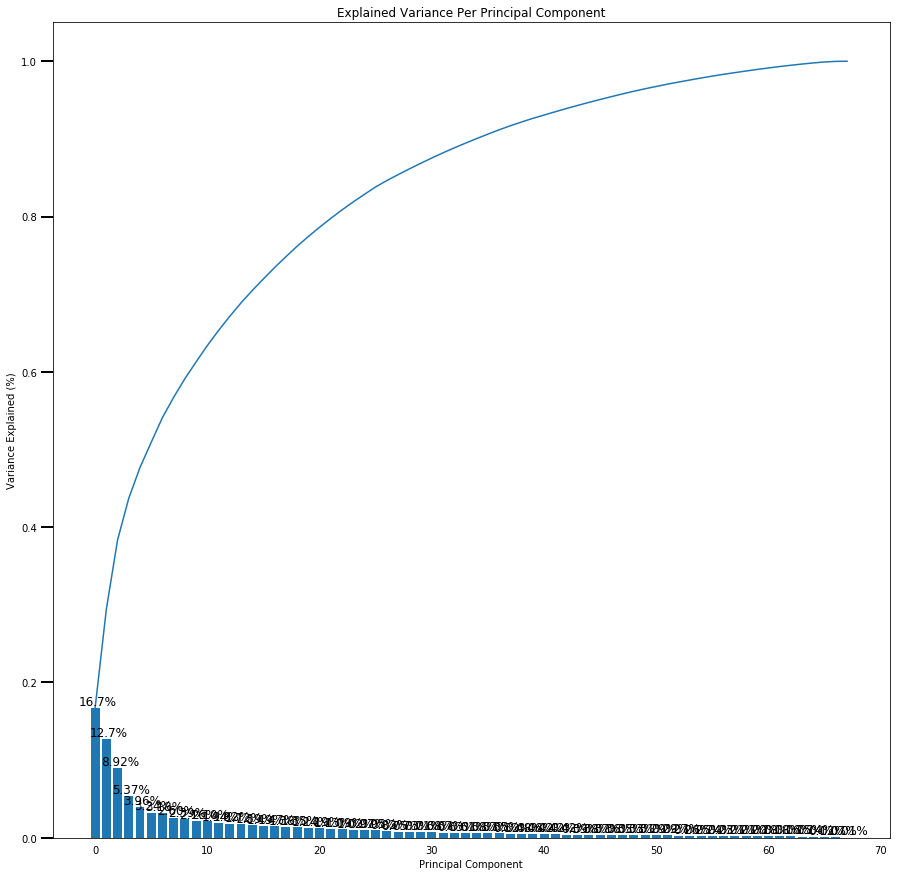

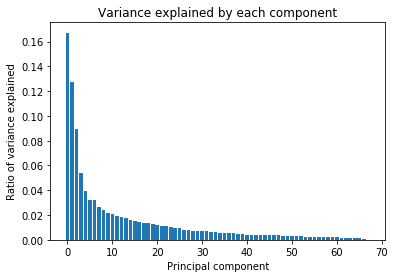

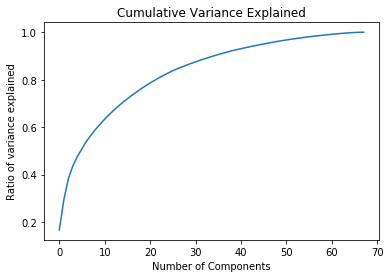

In [56]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    plt.show()


scree_plot(pca)
#OR
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

#and
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

In [57]:
scaled_data.shape

(797906, 68)

In [58]:
# Re-apply PCA to the data while selecting for number of components to retain.

# number of features is 68 and after Investigating the graphs above I will go eith 34 features
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

pca34,X_pca34=do_pca(34,scaled_data)


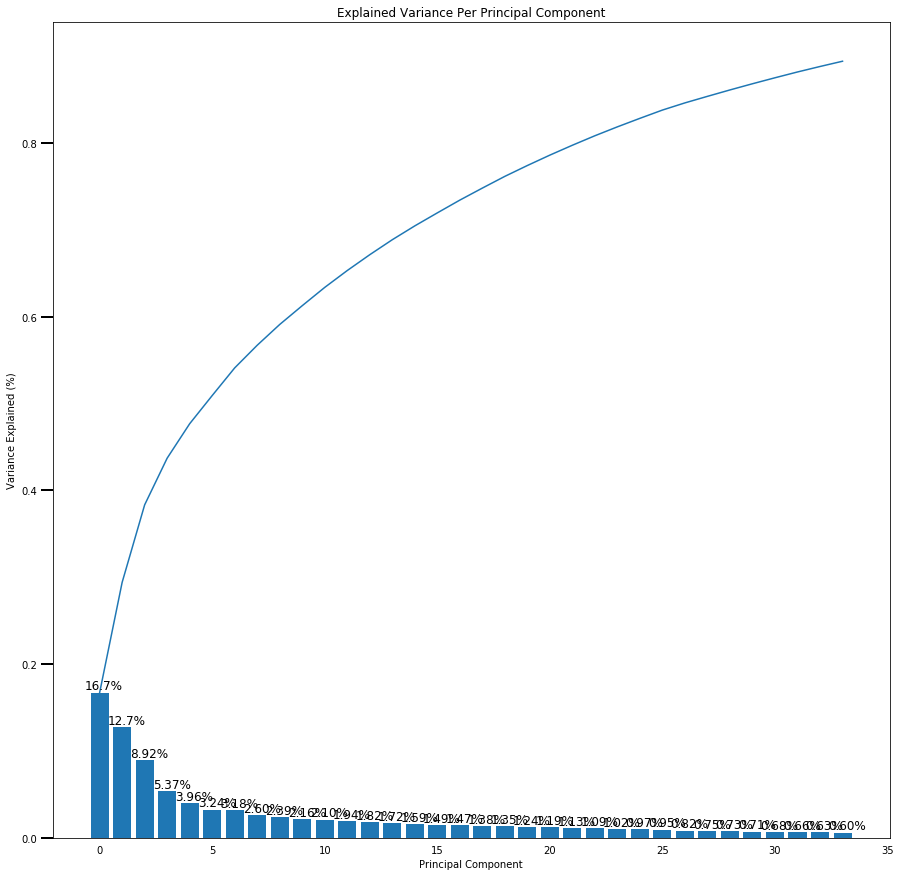

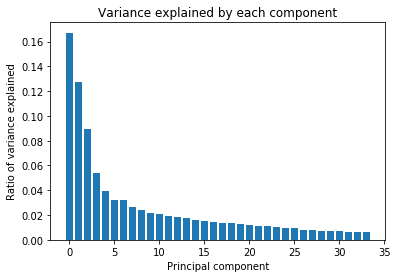

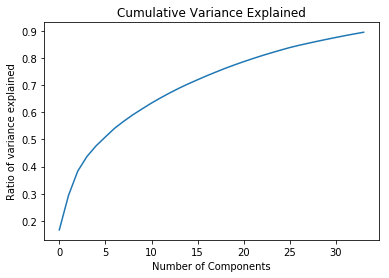

In [59]:
# Investigate the variance accounted for by each principal component after choosing number of features

def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    plt.show()


scree_plot(pca34)
#OR
plt.bar(range(len(pca34.explained_variance_ratio_)), pca34.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

#and
#and
plt.plot(range(len(pca34.explained_variance_ratio_)),np.cumsum(pca34.explained_variance_ratio_))
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

### Discussion 2.2: Perform Dimensionality Reduction

I have decided to have 34 principal components that I will retain in the next steps beacuse it is the half of the original feature size and it has almost 90% variance which is good because we are trying to capture the largest amount of variance resulting in much lower information lost

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [60]:
df_scaled_data =pd.DataFrame(scaled_data,columns=list(row_count_Nans_less_than_25.columns))
df_scaled_data.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage
0,-1.766002,0.957932,-1.494563,1.537958,-1.040677,1.466028,0.958855,1.339191,-0.530442,1.033993,...,-0.670187,1.455365,0.578272,-0.165317,-0.121771,0.685564,1.180885,0.277745,1.19318,-1.265924
1,0.201254,0.957932,-1.494563,0.864598,-1.766947,-0.570971,0.244297,1.339191,1.885219,1.033993,...,-0.670187,0.423884,0.578272,-0.165317,-0.121771,-0.788189,1.180885,-1.514012,-0.86239,0.762318
2,1.184882,0.957932,0.683201,-0.482123,1.138132,-0.570971,-1.184817,-0.791446,-0.530442,-0.302725,...,-0.670187,-0.607597,0.578272,-1.168554,-0.989697,-0.051313,-0.189618,0.277745,-1.54758,-0.589844
3,0.201254,-1.043916,0.683201,0.191237,0.411863,-1.249970,0.244297,-0.791446,-0.530442,1.033993,...,0.021676,-0.607597,-0.331042,0.837921,0.312192,1.422441,-0.189618,0.277745,0.50799,0.086237
4,-1.766002,0.957932,-0.042721,-1.155483,1.138132,-0.570971,-0.470260,1.339191,-0.530442,1.033993,...,-0.670187,1.455365,1.487587,-1.168554,-0.989697,-0.051313,-1.560120,0.277745,1.19318,0.762318


In [61]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def map_weight(pca, principal_component):
    df_mapped_weights=pd.DataFrame(pca.components_,columns=df_scaled_data.columns.tolist())
    mapped_weights = df_scaled_data.iloc[principal_component].sort_values(ascending=False)
    return mapped_weights

pca_first_principal_component = map_weight(pca34, 0)
print (pca_first_principal_component)

SOHO_KZ                  10.853881
KBA05_ANTG4               1.899241
INNENSTADT                1.701520
FINANZ_SPARER             1.537958
SEMIO_PFLICHT             1.518592
FINANZ_ANLEGER            1.466028
PLZ8_HHZ                  1.455365
SEMIO_DOM                 1.339250
FINANZ_HAUSBAUER          1.339191
SEMIO_TRADV               1.288940
SEMIO_RAT                 1.274185
wealth                    1.193180
decade                    1.180885
HEALTH_TYP                1.033993
HH_EINKOMMEN_SCORE        1.026559
KBA13_ANZAHL_PKW          1.020307
FINANZ_UNAUFFAELLIGER     0.958855
ANREDE_KZ                 0.957932
BALLRAUM                  0.846472
VERS_TYP                  0.760760
RELAT_AB                  0.685564
PLZ8_GBZ                  0.578272
WOHNDAUER_2008            0.567167
LP_LEBENSPHASE_FEIN       0.450972
SEMIO_SOZ                 0.443085
PLZ8_ANTG3                0.372301
LP_LEBENSPHASE_GROB       0.322045
PLZ8_ANTG4                0.300465
movement            

In [62]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_second_principal_component = map_weight(pca34, 1)
print (pca_second_principal_component)

GREEN_AVANTGARDE         1.885219
SEMIO_KAEM               1.448710
SEMIO_KRIT               1.392187
SEMIO_DOM                1.339250
FINANZ_HAUSBAUER         1.339191
KBA05_ANTG2              1.317058
KONSUMNAEHE              1.274918
decade                   1.180885
HEALTH_TYP               1.033993
ANREDE_KZ                0.957932
FINANZ_SPARER            0.864598
life_stage               0.762318
PLZ8_ANTG1               0.759708
SEMIO_ERL                0.754215
PLZ8_GBZ                 0.578272
WOHNDAUER_2008           0.567167
PLZ8_HHZ                 0.423884
KBA13_ANZAHL_PKW         0.294800
GEBAEUDETYP_RASTER       0.283536
FINANZ_UNAUFFAELLIGER    0.244297
KBA05_ANTG3              0.243389
PLZ8_ANTG2               0.218707
ALTERSKATEGORIE_GROB     0.201254
ANZ_HAUSHALTE_AKTIV      0.108145
SEMIO_RAT                0.064262
EWDICHTE                 0.035815
MOBI_REGIO               0.032224
ANZ_TITEL               -0.060393
SEMIO_SOZ               -0.072128
SOHO_KZ       

In [63]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_third_principal_component = map_weight(pca34, 2)
print (pca_third_principal_component)

KBA05_ANTG1              1.746368
WOHNLAGE                 1.511836
SEMIO_ERL                1.301625
ALTERSKATEGORIE_GROB     1.184882
FINANZ_VORSORGER         1.138132
MIN_GEBAEUDEJAHR         1.121492
ANREDE_KZ                0.957932
MOBI_REGIO               0.750058
INNENSTADT               0.715685
FINANZ_MINIMALIST        0.683201
KBA05_GBZ                0.662173
KONSUMNAEHE              0.630020
PLZ8_GBZ                 0.578272
WOHNDAUER_2008           0.567167
SEMIO_SOZ                0.443085
SEMIO_KAEM               0.377858
PLZ8_ANTG3               0.372301
GEBAEUDETYP_RASTER       0.283536
movement                 0.277745
SEMIO_TRADV              0.156149
KKK                      0.070424
KBA13_ANZAHL_PKW        -0.040493
RELAT_AB                -0.051313
ANZ_TITEL               -0.060393
SEMIO_KULT              -0.067437
BALLRAUM                -0.069602
SOHO_KZ                 -0.092133
SEMIO_PFLICHT           -0.099492
SEMIO_VERT              -0.142549
ANZ_HH_TITEL  

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)


I will report the third principle component:

<hr>

The interpretation of the component with positive values:
<br>

<ul>
<li>KBA05_ANTG1              1.746368 (RR3 micro-cell features,Number of 1-2 family houses in the microcell)</li>
<li>WOHNLAGE                 1.511836 (Building-level features,Neighborhood quality)</li>
<li>SEMIO_ERL                1.301625 (Person-level features,Personality typology)</li>
<li>ALTERSKATEGORIE_GROB     1.184882 (Person-level features,Estimated age based on given name analysis</li>
</ul>
<br>
The interpretation of the component with negative values:
<br>
<ul>
<li>SEMIO_MAT               -1.509147 (Person-level features,Personality typology)</li>
<li>wealth                  -1.547580 (RR4 micro-cell features,German CAMEO: Wealth / Life Stage Typology, rough scale)</li>
<li>SEMIO_FAM               -1.626965 (Person-level features,Personality typology)</li>
<li>HH_EINKOMMEN_SCORE      -2.209362 (Household-level features,Estimated household net income)</li>
</ul>
<br>
We can interpret that the thrid compnent indicate that there is a relationship between Neighborhood quality, Personality typology,age,Number of 1-2 family houses in the microcell, German CAMEO, net income


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [64]:
#will take long time to run
# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances.
from sklearn.cluster import KMeans
scores=[]
clusters=np.arange(6,20)
for k in clusters:
    Kmean=KMeans(n_clusters=k)
    model = Kmean.fit(X_pca34)
    scores.append(np.abs(model.score(X_pca34)))
    

Text(0.5,0,'number of clusters')

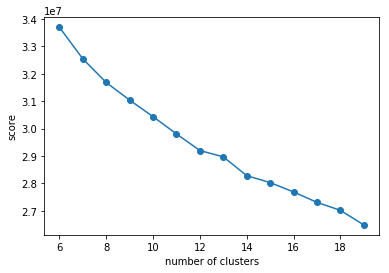

In [65]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(clusters, scores, linestyle='-', marker='o')
plt.ylabel('score')
plt.xlabel('number of clusters')



In [66]:
scores

[33698681.312690519,
 32544447.25578326,
 31683561.084816229,
 31040371.335092094,
 30437741.77035965,
 29807558.9847751,
 29202146.924096148,
 28970666.327986281,
 28285709.109714907,
 28031766.194298103,
 27691216.977445938,
 27310824.800641071,
 27020774.10103808,
 26488149.386216685]

In [67]:
#will take long time to run
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
Kmean=KMeans(n_clusters=14)
model = Kmean.fit(X_pca34)
AZDIAS_predictions=model.predict(X_pca34)


### Discussion 3.1: Apply Clustering to General Population

I have decided to choose 14 clusters by using the elbow method that shows the score of each number of clusters were used.The Elbow method indicate that the score(average distance between clusters) is decreased when we use 14 clusters.I know it doesn't seem like an Elbow however, I tried to find the most point that can be called an Elbow from the set of points

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [68]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',sep=";")

In [69]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [70]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

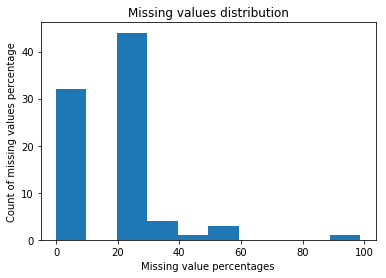

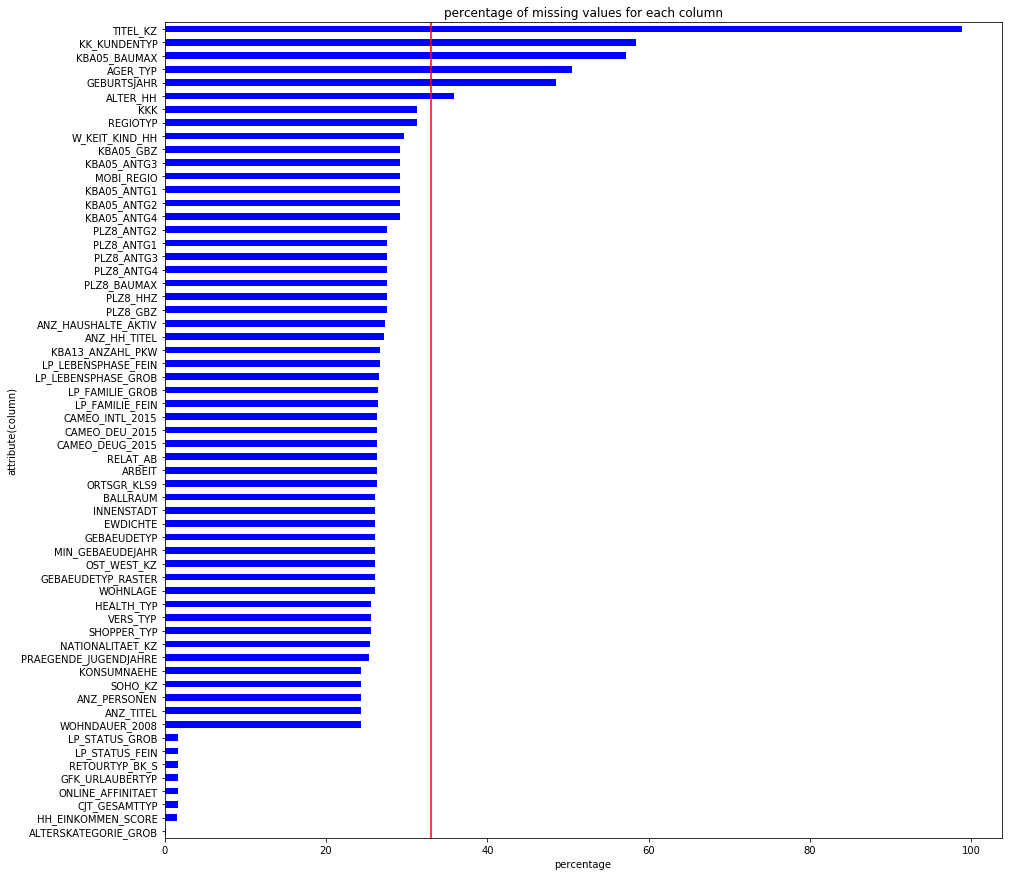

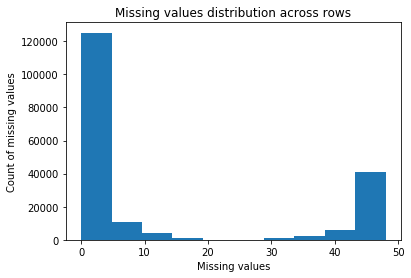

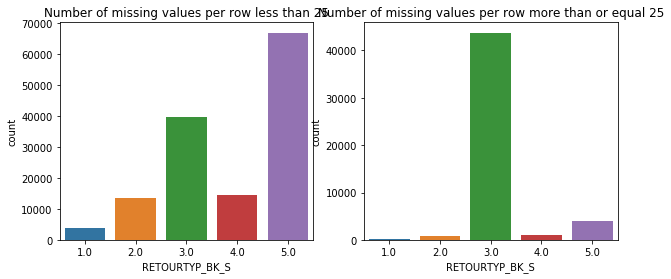

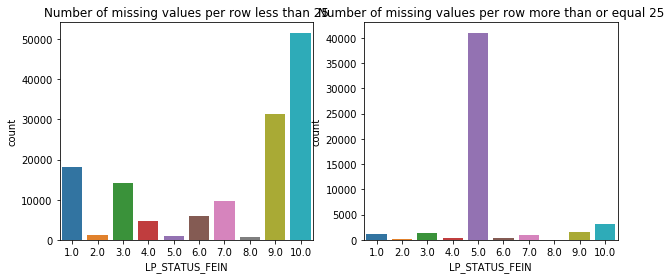

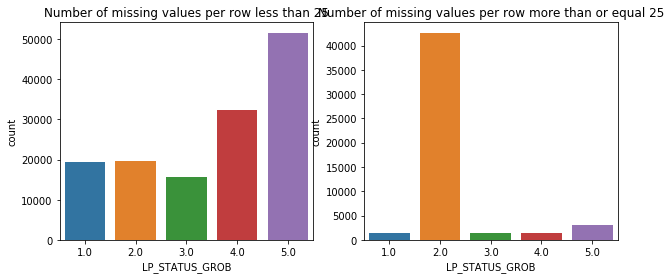

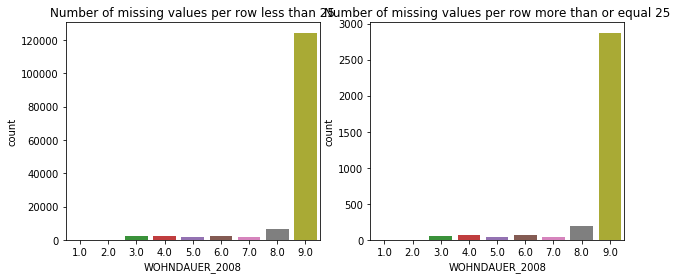

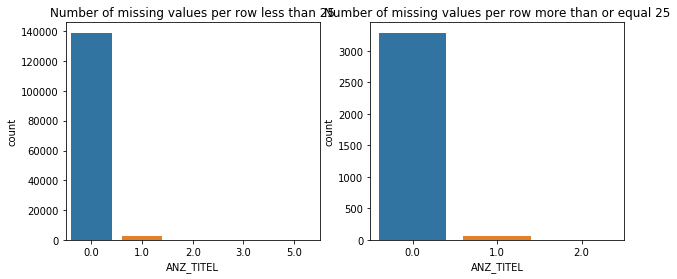

The Binary variables are 
 ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
--------------------------------------------------------
 
 

The multi-level variables are 
 ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [71]:
#cleaning the data using the user defined function clean function
cleaned_customers=clean_data(customers)

In [72]:
#scaling the data using standard scaler
scaled_customers=scaler.fit_transform(cleaned_customers)

In [73]:
#create dataframe from the scaled date
scaled_customers=pd.DataFrame(scaled_customers,columns=list(cleaned_customers.columns))


In [74]:
scaled_customers.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage
0,0.703055,-0.702960,0.723194,-0.516993,0.516260,-0.600704,0.137128,-0.553194,1.006876,-1.248877,...,-0.493967,1.479646,1.382444,-1.811494,-1.443036,-1.339590,-0.665918,-0.917474,-1.142334,-0.275709
1,0.703055,1.422556,0.723194,-0.516993,0.516260,-0.600704,2.180908,0.965764,1.006876,0.015983,...,1.166620,-0.683515,-1.621803,0.172076,-0.052483,0.070574,-0.665918,-0.917474,0.283242,0.472036
2,0.703055,-0.702960,0.723194,-0.516993,0.516260,0.396734,-0.884761,-0.553194,-0.993171,0.015983,...,-0.493967,-0.683515,0.381028,-1.811494,-0.979518,-1.339590,-1.411205,0.825791,-0.429546,0.472036
3,-0.667707,-0.702960,-1.241289,-0.516993,-0.665368,2.391610,3.202797,-0.553194,-0.993171,1.280844,...,0.336327,-0.683515,-0.620387,0.172076,-0.052483,-1.339590,0.824655,0.825791,0.996030,-1.771198
4,-0.667707,-0.702960,0.723194,-0.516993,0.516260,-0.600704,0.137128,0.206285,1.006876,1.280844,...,-0.493967,1.479646,1.382444,0.172076,0.874552,1.480738,-0.665918,-0.917474,0.283242,0.472036


In [75]:
#using the pca instance to pick 34 feature
scaled_customers_pca34=pca34.transform(scaled_customers)

In [76]:
#predict the clusters --->customer segments
predicted_customer_segments= model.predict(scaled_customers_pca34)


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

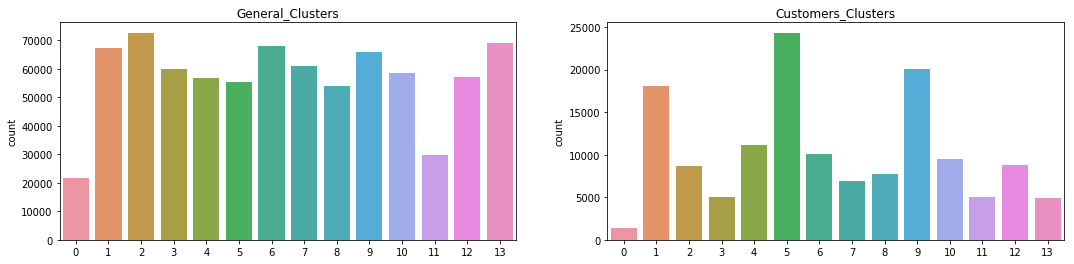

In [77]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

def compare_proportion(general_proportion,customers_proportion):
    figure, (x1, x2) = plt.subplots(1, 2)
    figure.set_figwidth(18)
    x1.set_title('General_Clusters')
    sns.countplot(general_proportion,ax=x1)

    x2.set_title('Customers_Clusters')
    sns.countplot(customers_proportion,ax=x2)
    plt.show()
compare_proportion(AZDIAS_predictions,predicted_customer_segments)

In [78]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
overrepresented_customer_cluster=scaler.inverse_transform(pca34.inverse_transform(scaled_customers_pca34[np.where(predicted_customer_segments==5)])).round()
df_overrepresented= pd.DataFrame(overrepresented_customer_cluster,columns=list(cleaned_customers.columns))
df_overrepresented.head()


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,1.0,5.0,5.0,1.0,3.0,1.0,2.0,0.0,1.0,3.0
1,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,1.0,3.0,3.0,3.0,4.0,3.0,2.0,0.0,1.0,5.0
2,3.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,1.0,3.0,4.0,2.0,3.0,1.0,3.0,0.0,1.0,4.0
3,3.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,1.0,5.0,5.0,2.0,6.0,1.0,3.0,-0.0,1.0,5.0
4,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,...,0.0,3.0,4.0,3.0,5.0,3.0,2.0,0.0,1.0,5.0


In [79]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
underrepresented_customer_cluster=scaler.inverse_transform(pca34.inverse_transform(scaled_customers_pca34[np.where(predicted_customer_segments==2)])).round()
df_underrepresented = pd.DataFrame(underrepresented_customer_cluster,columns=list(cleaned_customers.columns))
df_underrepresented.head()


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,decade,movement,wealth,life_stage
0,2.0,2.0,5.0,1.0,5.0,1.0,1.0,2.0,-0.0,3.0,...,1.0,4.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0
1,3.0,2.0,4.0,2.0,4.0,3.0,2.0,1.0,1.0,3.0,...,1.0,3.0,4.0,1.0,2.0,1.0,5.0,-0.0,2.0,2.0
2,3.0,2.0,4.0,2.0,4.0,3.0,2.0,1.0,1.0,2.0,...,1.0,4.0,5.0,2.0,3.0,1.0,4.0,-0.0,3.0,2.0
3,3.0,2.0,3.0,2.0,4.0,2.0,3.0,3.0,-0.0,2.0,...,1.0,5.0,5.0,3.0,6.0,3.0,4.0,1.0,3.0,1.0
4,3.0,2.0,3.0,2.0,3.0,4.0,2.0,5.0,-0.0,1.0,...,1.0,5.0,5.0,3.0,4.0,0.0,4.0,1.0,3.0,3.0


### Discussion 3.3: Compare Customer Data to Demographics Data
From the graph we can see that cluster 5 has the largest number of customer where to general is more likely to cluster 2, 13, and 6.for cluster 1, and 9 there are a lot of customer belongs to them however, there is a big difference between them and cluster 5.For most clusters in the general data there are a good number of people belong to each cluster and at the same time the difference between them and 2, 13, 6 is not that big. 
